Classification of breast Cancer 

In [62]:
# import libraries we going to use 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")  

In [63]:
# let's read and understand the data
df = pd.read_csv("D:\Codes\ML.Data/breast-cancer.csv")

In [64]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [65]:
# we only have one object column and the rest is float and int
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [66]:
# description of data 
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [67]:
# we have no null values so we are good to go
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [68]:
# we have no null values so we are good to go
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [69]:
# now lets see the values of our target 
df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

<Axes: xlabel='diagnosis'>

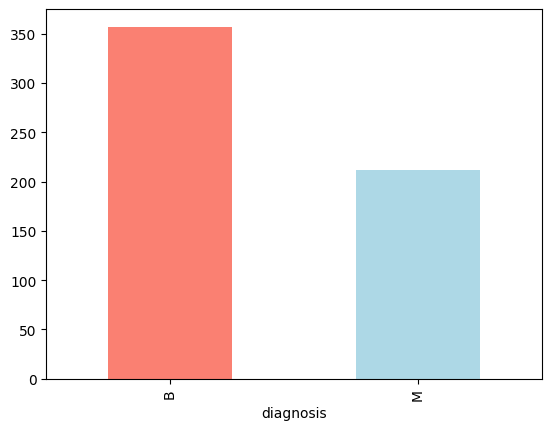

In [70]:
# now lets plot our target
df.diagnosis.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [71]:
# Data preparation 
# we drop coulmns we dont need and wont affect our models 
df.drop(columns=["id"] , inplace= True)

In [72]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [73]:
# now lets set up our X and y
X = df.iloc[ : , 1:].values
y = df.iloc[ : , 0].values

In [74]:
print('the dataframe shape is ' , df.shape)
print('the X shape is ' , X.shape)
print('the y shape is ' , y.shape)

the dataframe shape is  (569, 31)
the X shape is  (569, 30)
the y shape is  (569,)


In [75]:
# then we label our y 
from sklearn.preprocessing import LabelEncoder 
scaler = LabelEncoder()
y = scaler.fit_transform(y)
print('the scaled y =' , y)


the scaled y = [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0

In [76]:
# for more understanding lets see what columns is categorical and whats is continous
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

diagnosis : ['M' 'B']
radius_mean : [17.99  20.57  19.69  11.42  20.29  12.45  18.25  13.71  13.    12.46
 16.02  15.78  19.17  15.85  13.73  14.54  14.68  16.13  19.81  13.54
 13.08   9.504 15.34  21.16  16.65  17.14  14.58  18.61  15.3   17.57
 18.63  11.84  17.02  19.27  16.74  14.25  13.03  14.99  13.48  13.44
 10.95  19.07  13.28  13.17  18.65   8.196 12.05  13.49  11.76  13.64
 11.94  18.22  15.1   11.52  19.21  14.71  13.05   8.618 10.17   8.598
  9.173 12.68  14.78   9.465 11.31   9.029 12.78  18.94   8.888 17.2
 13.8   12.31  16.07  13.53  18.05  20.18  12.86  11.45  13.34  25.22
 19.1   12.    18.46  14.48  19.02  12.36  14.64  14.62  15.37  13.27
 13.45  15.06  20.26  12.18   9.787 11.6   14.42  13.61   6.981  9.876
 10.49  13.11  11.64  22.27  11.34   9.777 12.63  14.26  10.51   8.726
 11.93   8.95  14.87  17.95  11.41  18.66  24.25  14.5   13.37  13.85
 19.    19.79  12.19  15.46  16.16  15.71  18.45  12.77  11.71  11.43
 14.95  11.28   9.738 16.11  12.9   10.75  11.9   11

In [77]:
print('the categorical columns is ', categorical_val)

the categorical columns is  ['diagnosis']


In [78]:
print('the continous columns is ', continous_val)

the continous columns is  ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


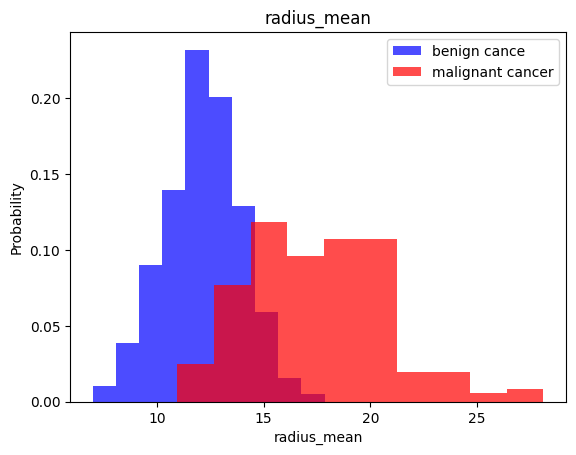

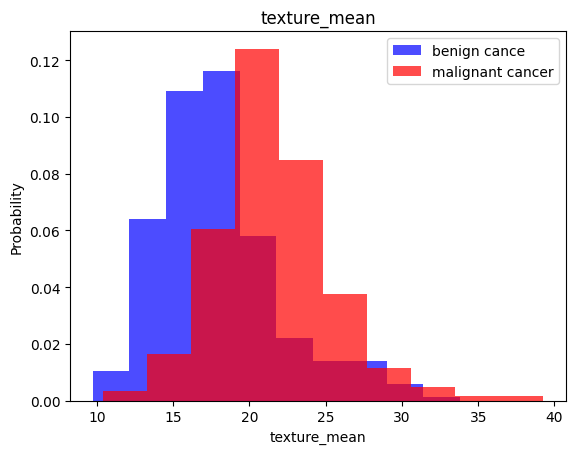

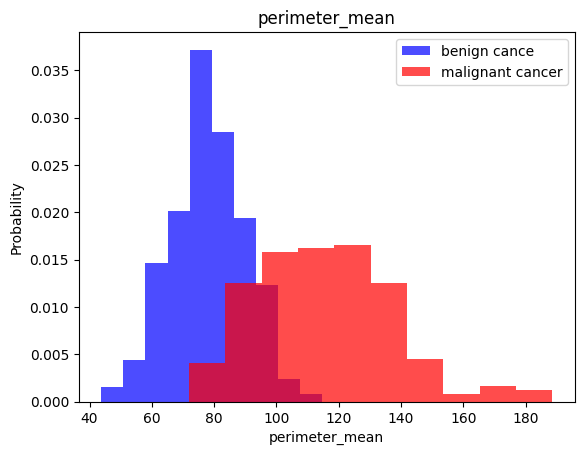

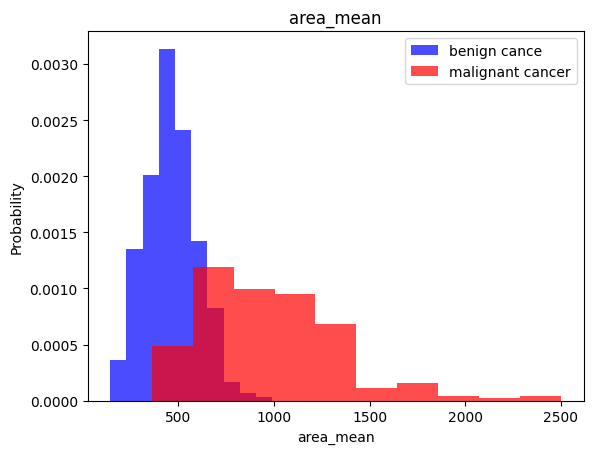

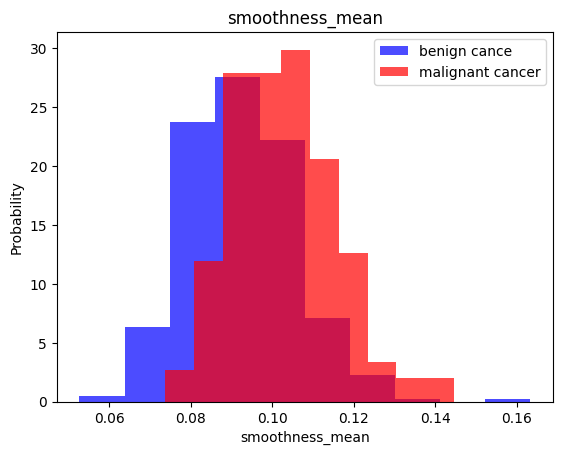

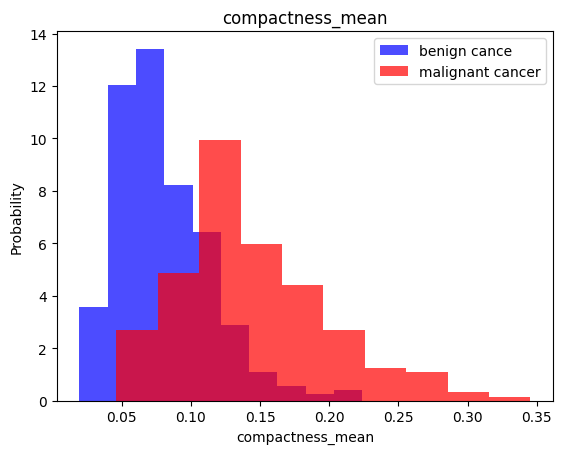

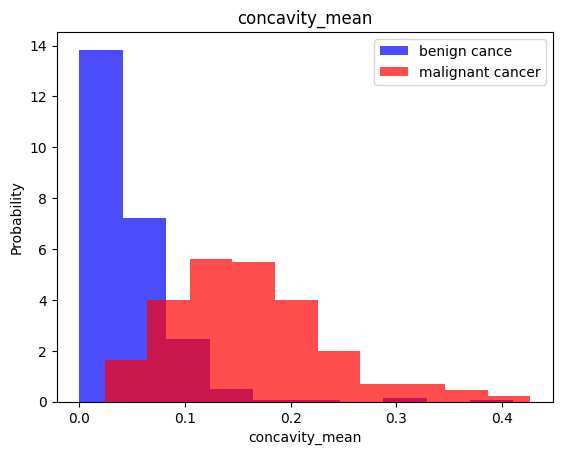

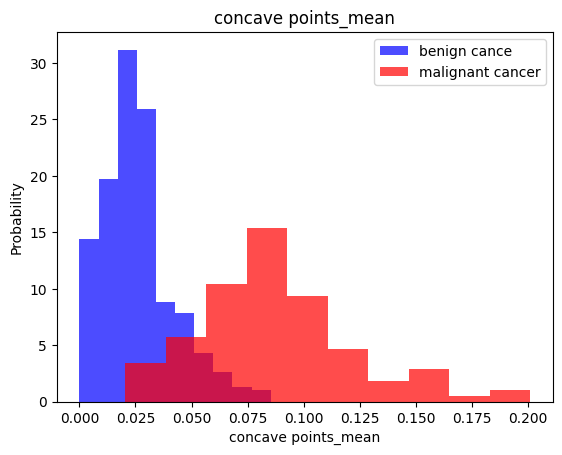

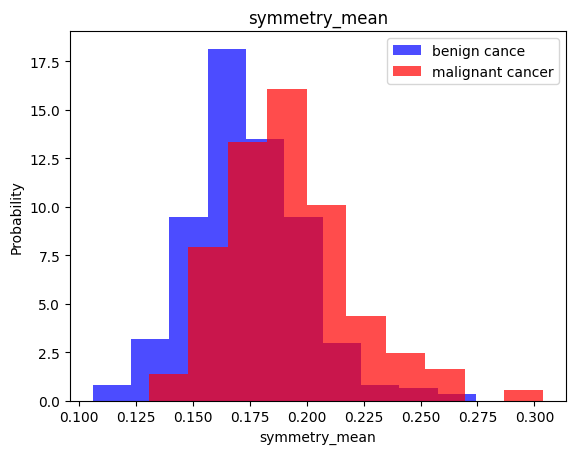

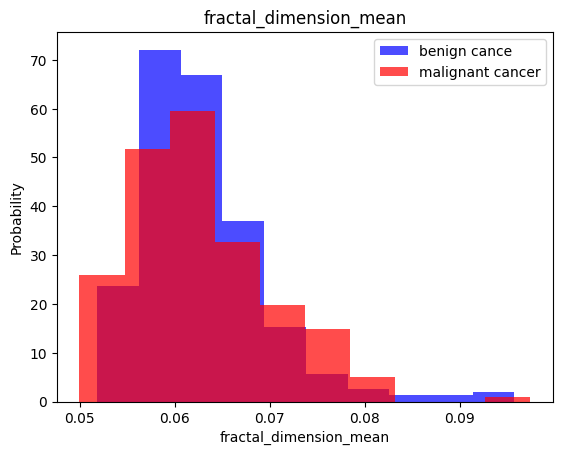

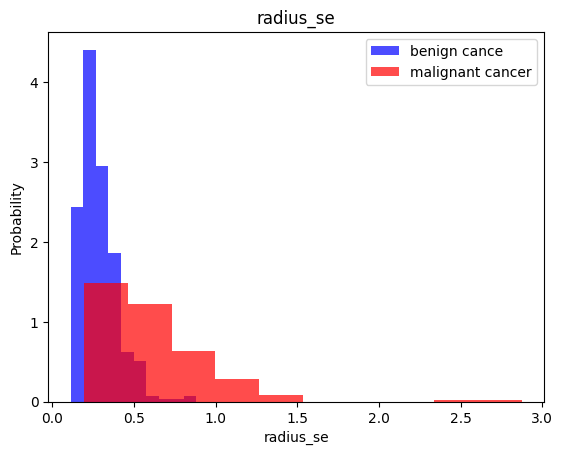

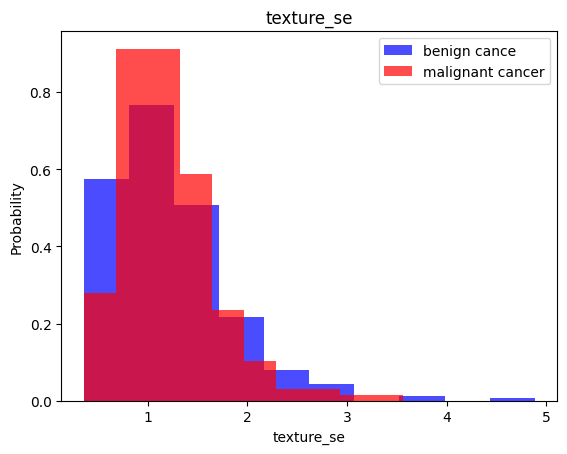

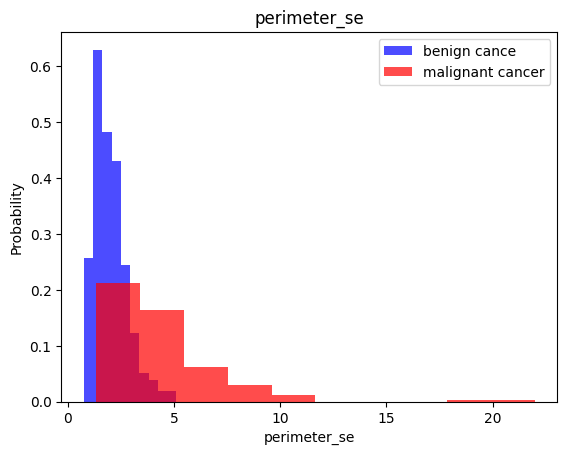

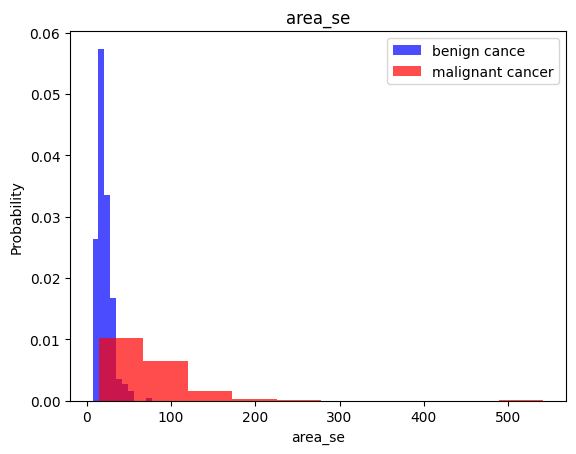

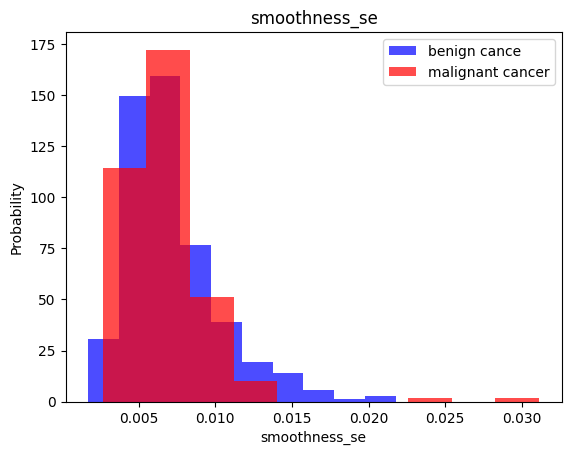

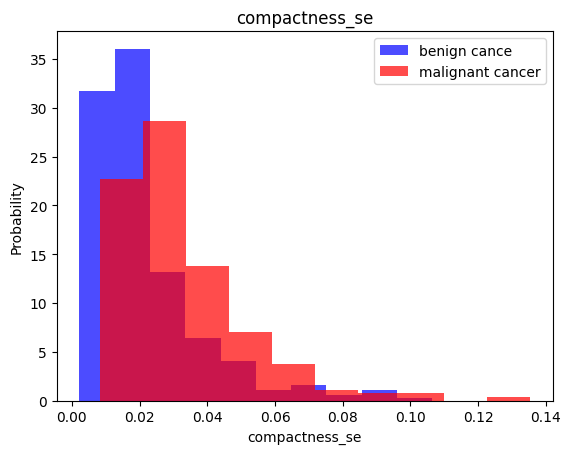

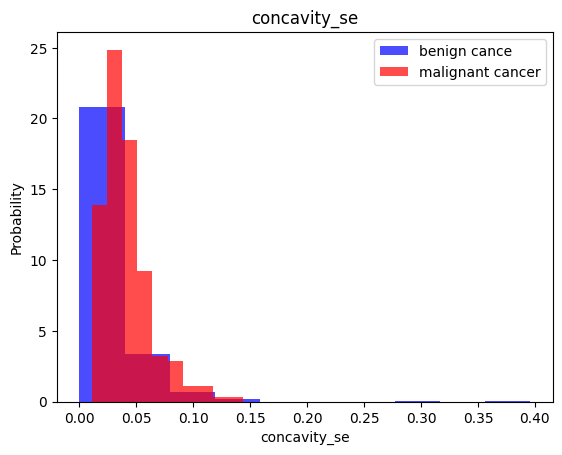

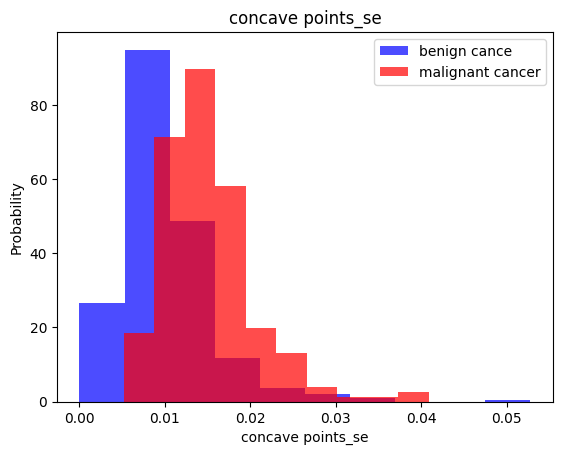

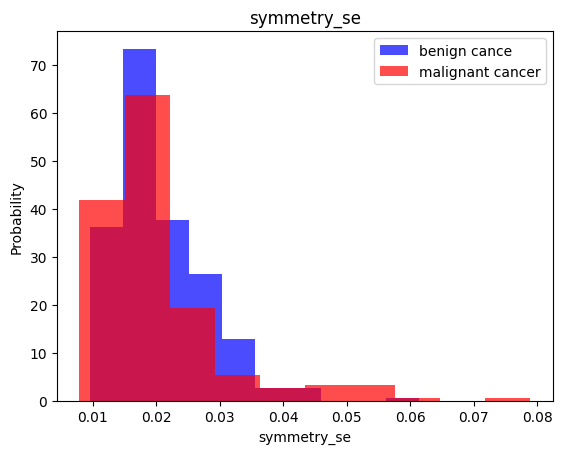

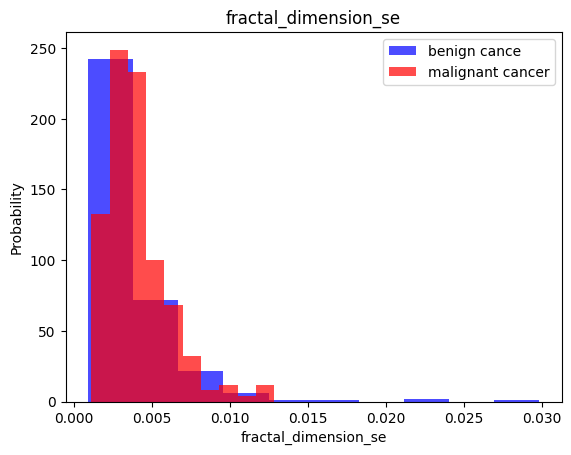

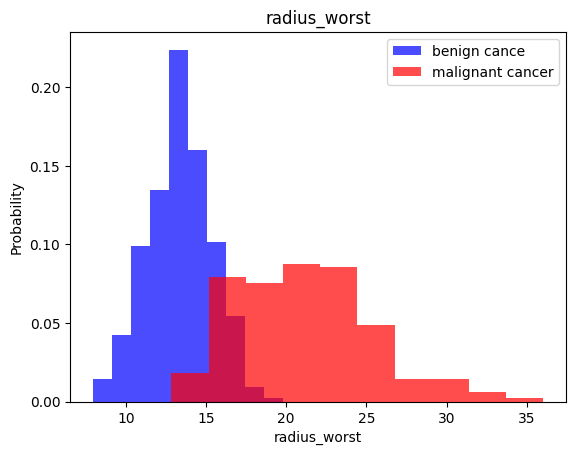

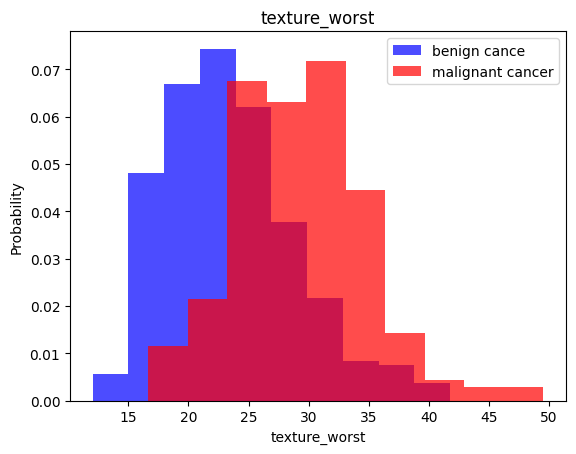

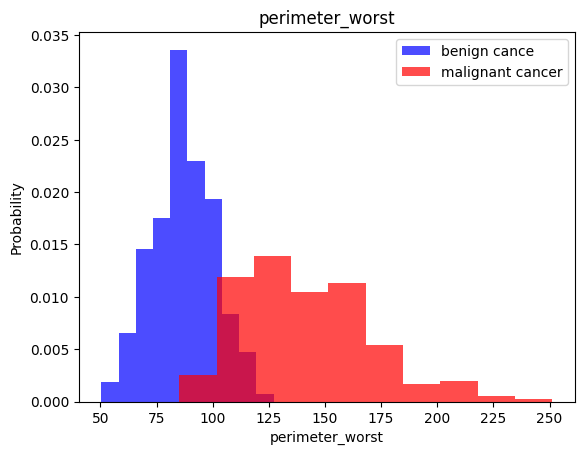

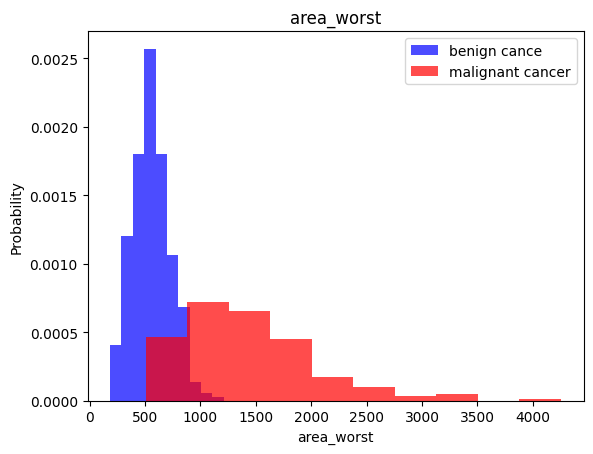

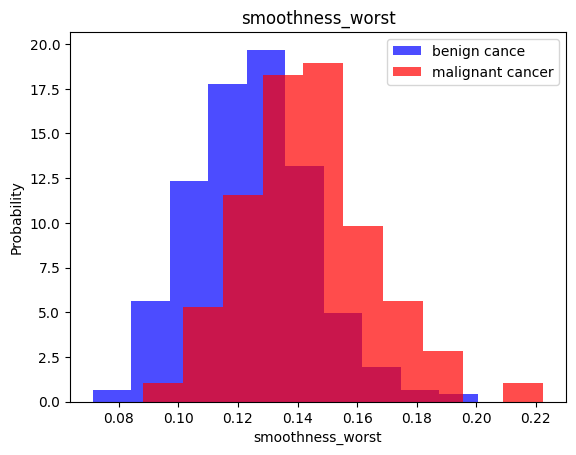

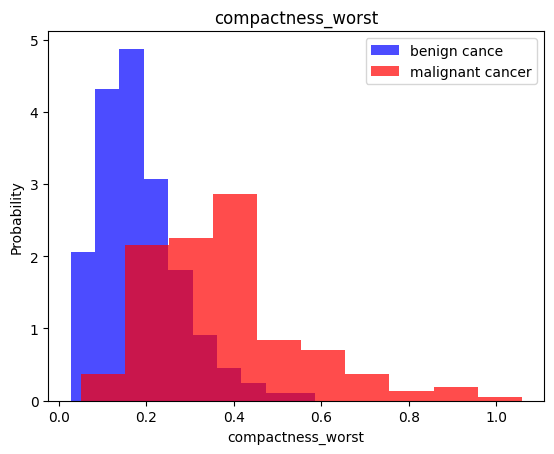

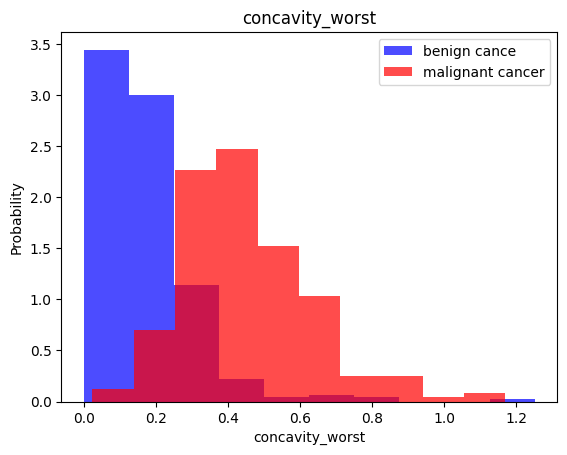

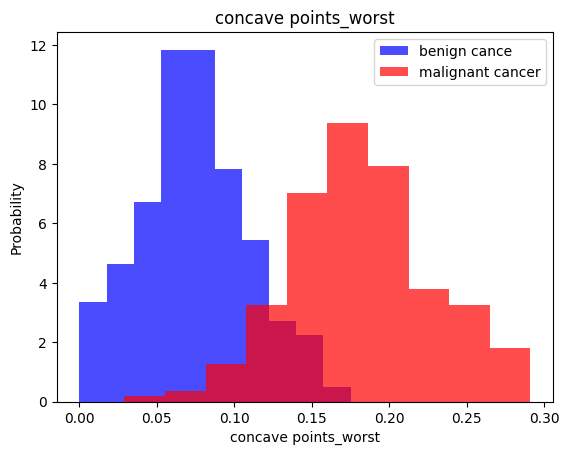

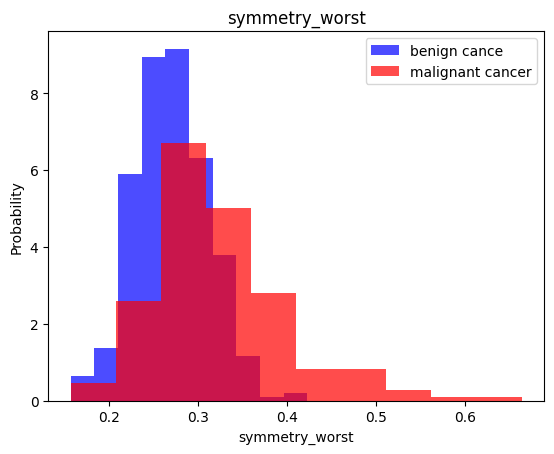

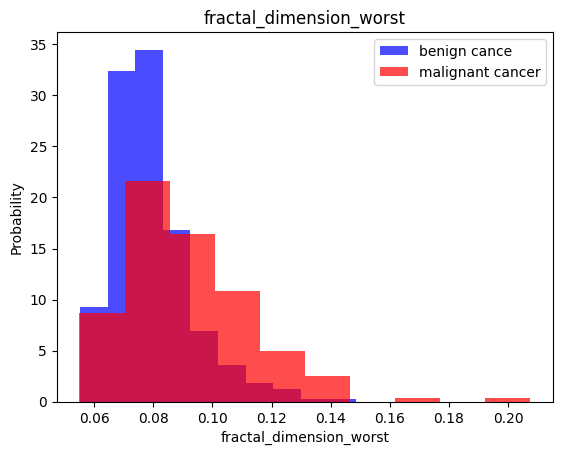

In [79]:
# now lets plot our data
for label in df.columns[1:]:
  plt.hist(df[df["diagnosis"]=='B'][label], color='blue', label='benign cance', alpha=0.7, density=True)
  plt.hist(df[df["diagnosis"]=='M'][label], color='red', label='malignant cancer', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [80]:
# now lets scale our input X 
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler() 
X = scaler.fit_transform(X)  

In [81]:
# now we split data 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2)

In [82]:
# this function to evaluate our model performance 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score ,classification_report , f1_score
    
def evaluating_model(y_test, y_pred):  
    ''' 
    Function for evaluating our models.
    '''
    print("Train Result:\n================================================")
    print("Accuracy Score:- ", accuracy_score(y_test, y_pred)) 
    print("Precision Score:- ", precision_score(y_test, y_pred)) 
    print("Recall Score:- ", recall_score(y_test, y_pred)) 
    print('f1 score ' , f1_score(y_test,y_pred))
    print("Confusion Matrix:- \n ", confusion_matrix(y_test, y_pred))
    print('classification report \n'  , classification_report(y_test,y_pred))

In [83]:
# this fuction to grid seacrh our hyperparamters of each model for best performance
from sklearn.model_selection import GridSearchCV

def grid_search(model , paramters ):
    '''
    function to grid search paramters
    
    '''
    tuning_model = GridSearchCV(estimator=model,param_grid=paramters)
    tuning_model.fit(X_train, y_train)
    print("the best paramter is " , tuning_model.best_params_)
    print("the best score is " , tuning_model.best_score_)

Logestic Regression

In [84]:
from sklearn.linear_model import LogisticRegression 
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)
y_pred_Lg = lg_model.predict(X_test)


In [85]:
# model evaluation
lg_evaluation = evaluating_model(y_test , y_pred_Lg)

Train Result:
Accuracy Score:-  0.9912280701754386
Precision Score:-  1.0
Recall Score:-  0.9811320754716981
f1 score  0.9904761904761905
Confusion Matrix:- 
  [[61  0]
 [ 1 52]]
classification report 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        61
           1       1.00      0.98      0.99        53

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



Descision Tree Classifier

In [86]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier()


In [89]:
# paramters of DT 
DT_parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,12],
           "min_samples_leaf":[1,5,6,7,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.7],
           "max_features":["auto",None],
           "max_leaf_nodes":[10,30,50] }

In [90]:
# lets find best paramters 
grid_search(DT_model,DT_parameters)

the best paramter is  {'max_depth': 5, 'max_features': None, 'max_leaf_nodes': 50, 'min_samples_leaf': 7, 'min_weight_fraction_leaf': 0.1, 'splitter': 'random'}
the best score is  0.9274725274725274


In [91]:
tuned_model_DT = DecisionTreeClassifier(max_depth=11 , max_features=None , min_samples_leaf=3 , min_weight_fraction_leaf=0.1,
                                        splitter= 'random' , max_leaf_nodes=90)
tuned_model_DT.fit(X_train , y_train)
y_pred_DT = tuned_model_DT.predict(X_test)

In [92]:
# and evaluate our model 
DT_evaluation = evaluating_model(y_test , y_pred_DT)

Train Result:
Accuracy Score:-  0.9385964912280702
Precision Score:-  0.896551724137931
Recall Score:-  0.9811320754716981
f1 score  0.9369369369369369
Confusion Matrix:- 
  [[55  6]
 [ 1 52]]
classification report 
               precision    recall  f1-score   support

           0       0.98      0.90      0.94        61
           1       0.90      0.98      0.94        53

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



Random Forest 

In [93]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier()



In [98]:
# paramters of random forest
RF_paramters =  {'bootstrap': [True, False],
 'max_depth': [10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200]}


In [99]:
# lets search paramters
grid_search(RF_model ,RF_paramters)

the best paramter is  {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
the best score is  0.9648351648351647


In [100]:
# now we apply the best paramters
tuning_model_RF = RandomForestClassifier(bootstrap=True , max_depth=60 ,max_features='sqrt' , min_samples_leaf=1,
                                         min_samples_split=2 ,n_estimators=200 )
tuning_model_RF.fit(X_train, y_train)
y_pred_RF = tuning_model_RF.predict(X_test)

In [101]:
# evaluation of model
RF_evaluation = evaluating_model(y_test , y_pred_RF)

Train Result:
Accuracy Score:-  0.956140350877193
Precision Score:-  0.98
Recall Score:-  0.9245283018867925
f1 score  0.9514563106796116
Confusion Matrix:- 
  [[60  1]
 [ 4 49]]
classification report 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        61
           1       0.98      0.92      0.95        53

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.96       114
weighted avg       0.96      0.96      0.96       114



XGboost 


In [102]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()

In [103]:
# paramters of XBG
paramters_XGb = {
    'max_depth': [3,5],
    'learning_rate':[0.05,0.1],
    'n_estimators':[50],
    'min_child_weight' : [1,2,3],
    'gamma': [0.5,1,2],
    'subsample': [0.6,1.0],
    'colsample_bytree': [0.6,1.0],
    'reg_alpha': [0,0.2,1],
    'reg_lambda': [0,0.1,0.8]
}



In [104]:
# lets search the paramters 
grid_search(xgb_model , paramters_XGb)

the best paramter is  {'colsample_bytree': 1.0, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 50, 'reg_alpha': 0, 'reg_lambda': 0, 'subsample': 1.0}
the best score is  0.9714285714285715


In [105]:
# apply paramters 
tuning_model_Xbg = xgb.XGBClassifier(colsampl_bytree = 0.6 , gamma = 0.5 , learning_rate =0.1 , max_depth = 5 , min_childe_weight = 2
                                     , n_estimator = 50 , reg_alpha = 0 , reg_lamdba = 0 , subsample = 1)
tuning_model_Xbg.fit(X_train , y_train)
y_pred_Xgb = tuning_model_Xbg.predict(X_test)


[11:04:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsampl_bytree", "min_childe_weight", "n_estimator", "reg_lamdba" } are not used.



In [106]:
# evaluation of model
xgb_evaluation = evaluating_model(y_test , y_pred_Xgb)

Train Result:
Accuracy Score:-  0.9736842105263158
Precision Score:-  0.9807692307692307
Recall Score:-  0.9622641509433962
f1 score  0.9714285714285713
Confusion Matrix:- 
  [[60  1]
 [ 2 51]]
classification report 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98        61
           1       0.98      0.96      0.97        53

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Naive Bayes

In [107]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(X_train , y_train)
y_pred_NB = NB_model.predict(X_test)


In [108]:
# naive bayes evaluation
NB_evaluation = evaluating_model(y_test , y_pred_NB)

Train Result:
Accuracy Score:-  0.9385964912280702
Precision Score:-  0.96
Recall Score:-  0.9056603773584906
f1 score  0.9320388349514563
Confusion Matrix:- 
  [[59  2]
 [ 5 48]]
classification report 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94        61
           1       0.96      0.91      0.93        53

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



 support vector machine

In [109]:
from sklearn.svm import SVC   
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)
y_pred_SVM = svm_model.predict(X_test)


In [110]:
# SVM evaluation
SVM_evaluation = evaluating_model(y_test, y_pred_NB)

Train Result:
Accuracy Score:-  0.9385964912280702
Precision Score:-  0.96
Recall Score:-  0.9056603773584906
f1 score  0.9320388349514563
Confusion Matrix:- 
  [[59  2]
 [ 5 48]]
classification report 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94        61
           1       0.96      0.91      0.93        53

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



KNN

In [111]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier()

In [112]:
# KNN paramters
paramters_KNN = { 'n_neighbors' : [3,5,7,9],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan'],
               'leaf_size' : [ 1 , 20 ,40],
               'p' : [1,2]}

In [113]:
# hyperparamters search
grid_search(model_KNN , paramters_KNN)

the best paramter is  {'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
the best score is  0.9736263736263737


In [114]:
# apply of paramters
tuned_model_KNN = KNeighborsClassifier(leaf_size= 1 , metric = 'minkowski' , n_neighbors=3 , weights= 'uniform'  , p = 1)
tuned_model_KNN.fit(X_train , y_train)
y_pred_KNN = tuned_model_KNN.predict(X_test)


In [115]:
# evaluation of model
Knn_evaluation = evaluating_model(y_test , y_pred_KNN)

Train Result:
Accuracy Score:-  0.956140350877193
Precision Score:-  0.98
Recall Score:-  0.9245283018867925
f1 score  0.9514563106796116
Confusion Matrix:- 
  [[60  1]
 [ 4 49]]
classification report 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        61
           1       0.98      0.92      0.95        53

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.96       114
weighted avg       0.96      0.96      0.96       114



Neural Network 

In [116]:
import tensorflow as tf

In [131]:
# set our model 
def train_model():
  '''
  this function is used to make copy of model and use it in grid search
  '''
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(32, activation='relu'),
     
      tf.keras.layers.Dense(16, activation='relu'),
      
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)  , loss='binary_crossentropy' , metrics=["accuracy"] )
  nn_model.fit(X_train, y_train, epochs=100, batch_size=16 ,validation_split=.02, verbose = 0)
  return nn_model     

In [132]:
# making copy of model and grid search paramters 
from sklearn.model_selection import GridSearchCV 
from scikeras.wrappers import KerasRegressor
classifier = KerasRegressor(build_fn = train_model)
#What hyperparameter we want to play with
parameters = {'batch_size': [16, 32],
              'epochs': [80 ,100],
              'optimizer': ['adam', 'Adamax'],
              }
tuning_model_nn= GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',n_jobs = -1
                           )
tuning_model_nn.fit(X_train, y_train, verbose = 0)

GridSearchCV(estimator=KerasRegressor(build_fn=<function train_model at 0x0000015648306200>),
             n_jobs=-1,
             param_grid={'batch_size': [16, 32], 'epochs': [80, 100],
                         'optimizer': ['adam', 'Adamax']},
             scoring='accuracy')

In [133]:
print("the best paramter is " , tuning_model_nn.best_params_)


the best paramter is  {'batch_size': 16, 'epochs': 80, 'optimizer': 'adam'}


In [145]:
# now lets apply paramters
nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(32, activation='relu'),
     
      tf.keras.layers.Dense(16, activation='relu'),
      
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)  , loss='binary_crossentropy' , metrics=["accuracy"] )

history =nn_model.fit(X_train, y_train, epochs=300, batch_size=16 , validation_split=.02  ,verbose = 0)

y_pred_nn = nn_model.predict(X_test)

       

4/4 [==============================] - 0s 2ms/step


In [147]:
# and evaluate model
y_pred_nn_ev = (y_pred_nn > 0.5).astype(int).reshape(-1,) 
nn_evaluation = evaluating_model(y_test , y_pred_nn_ev)

Train Result:
Accuracy Score:-  0.9824561403508771
Precision Score:-  1.0
Recall Score:-  0.9622641509433962
f1 score  0.9807692307692307
Confusion Matrix:- 
  [[61  0]
 [ 2 51]]
classification report 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        61
           1       1.00      0.96      0.98        53

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



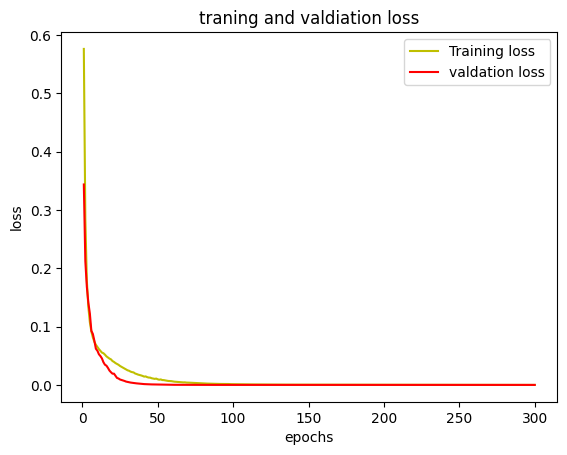

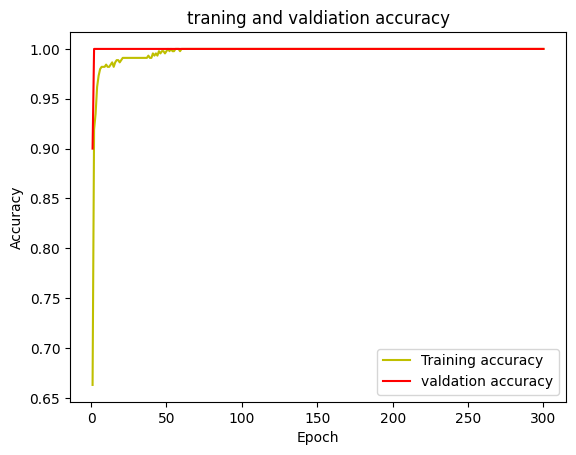

In [146]:
# now we plot loss and accuracy of training and Valdation 
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='valdation loss')
plt.title('traning and valdiation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

acc = history.history['accuracy']  
val_acc = history.history['val_accuracy']
plt.plot(epochs , acc, "y" ,label='Training accuracy') 
plt.plot(epochs, val_acc,"r" , label='valdation accuracy')
plt.title('traning and valdiation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Sum up all moduels

In [137]:
# now lets see the classification report of  all moduels score 
# Logestic Reg
print('classification report \n'  , classification_report(y_test,y_pred_Lg))








classification report 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        61
           1       1.00      0.98      0.99        53

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [138]:
# SVM
print('classification report \n'  , classification_report(y_test,y_pred_SVM))


classification report 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        61
           1       1.00      0.94      0.97        53

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [139]:
# Naive Bayes
print('classification report \n'  , classification_report(y_test,y_pred_NB))


classification report 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94        61
           1       0.96      0.91      0.93        53

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



In [140]:
#KNN
print('classification report \n'  , classification_report(y_test,y_pred_KNN))


classification report 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        61
           1       0.98      0.92      0.95        53

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.96       114
weighted avg       0.96      0.96      0.96       114



In [141]:
# Decision Tree
print('classification report \n'  , classification_report(y_test,y_pred_DT))

classification report 
               precision    recall  f1-score   support

           0       0.98      0.90      0.94        61
           1       0.90      0.98      0.94        53

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



In [142]:
# Random Forest
print('classification report \n'  , classification_report(y_test,y_pred_RF))


classification report 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        61
           1       0.98      0.92      0.95        53

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.96       114
weighted avg       0.96      0.96      0.96       114



In [143]:
# XGboost
print('classification report \n'  , classification_report(y_test,y_pred_Xgb))

classification report 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98        61
           1       0.98      0.96      0.97        53

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [144]:
# Neural Network
print('classification report \n'  , classification_report(y_test,y_pred_nn_ev))


classification report 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        61
           1       1.00      0.98      0.99        53

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

